In [30]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, Dataset

**Visualise images**

In [20]:
# Define the file path template
file_path = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\train\{}'

# Read five images from each category
images0 = [cv2.imread(file_path.format(f'{i:06d}.jpg')) for i in range(5)]  
images1 = [cv2.imread(file_path.format(f'{100000 + i}.jpg')) for i in range(5)]  
images2 = [cv2.imread(file_path.format(f'{200000 + i}.jpg')) for i in range(5)]  


In [22]:
# Convert all images to RGB after reading
images0_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images0]
images1_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images1]
images2_rgb = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images2]

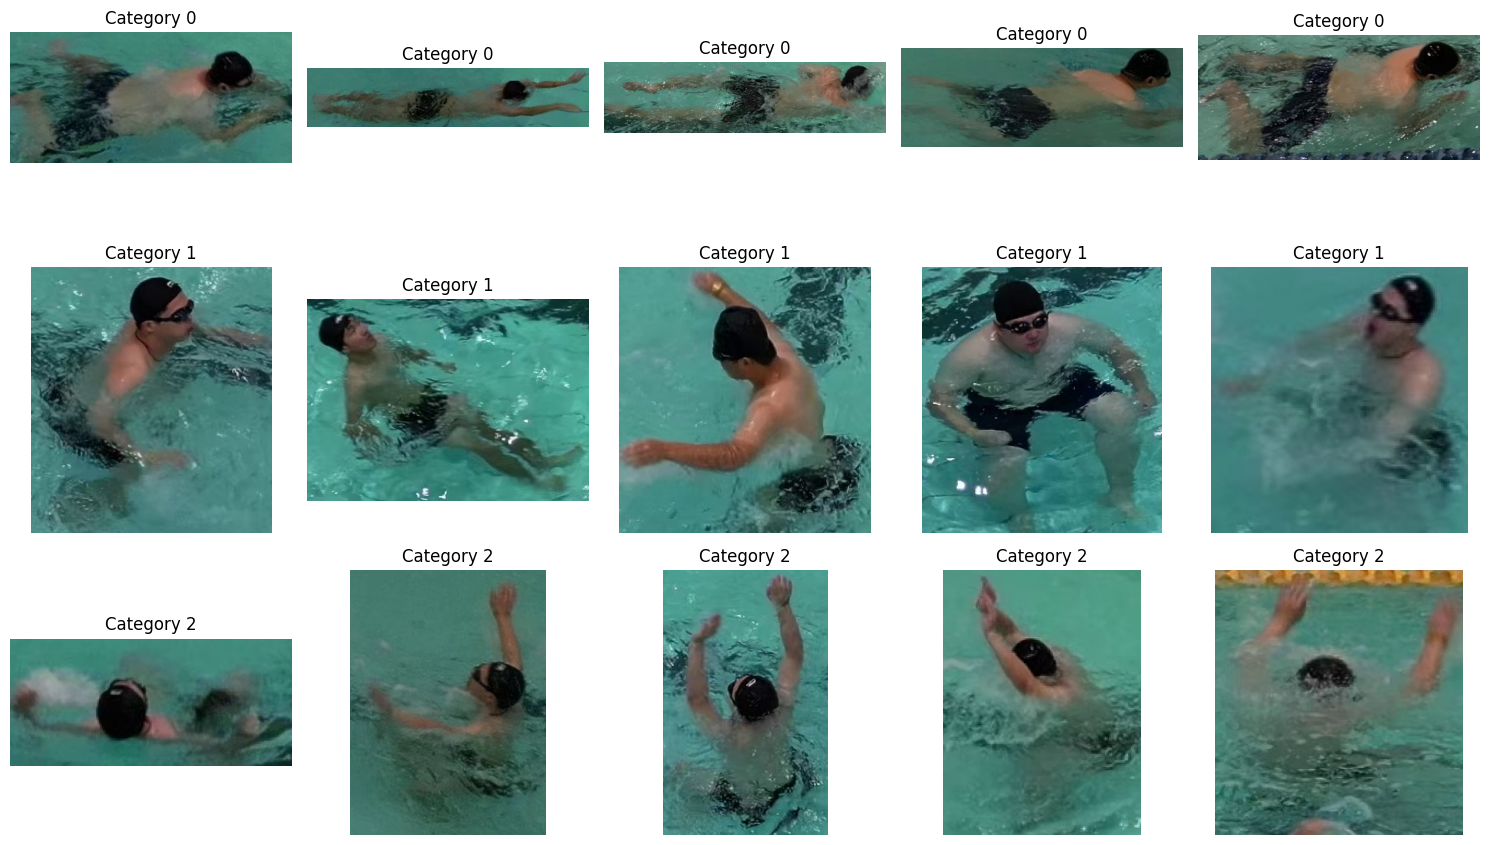

In [ ]:
# Combine all images in one list
all_rgb_images = images0_rgb + images1_rgb + images2_rgb

# Display the images in a 3x5 grid
plt.figure(figsize=(15, 9))

for i, img in enumerate(all_rgb_images):
    plt.subplot(3, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Category {i // 5}')  # Labels for each row

plt.tight_layout()
plt.show()

**Create baseline**

In [28]:
# Define the file path template
train_file_path = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\train\{}'
val_file_path = r'C:\Users\hp\OneDrive\Documents\Degree\BMCS2133 Image Processing\Drowning-Detection\cropped_data\val\{}'

# Read 10(train), 5(val) images from each category
train_images0 = [cv2.imread(train_file_path.format(f'{i:06d}.jpg')) for i in range(20)]  
train_images1 = [cv2.imread(train_file_path.format(f'{100000 + i}.jpg')) for i in range(20)]  
train_images2 = [cv2.imread(train_file_path.format(f'{200000 + i}.jpg')) for i in range(20)] 

val_images0 = [cv2.imread(val_file_path.format(f'{i:06d}.jpg')) for i in range(5)]
val_images1 = [cv2.imread(val_file_path.format(f'{100000 + i}.jpg')) for i in range(5)]
val_images2 = [cv2.imread(val_file_path.format(f'{200000 + i}.jpg')) for i in range(5)]

all_train_images = train_images0 + train_images1 + train_images2
all_val_images = val_images0 + val_images1 + val_images2

In [ ]:
# Image transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])


train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)